In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)

In [3]:
# Set your local datbase parameters 
db_username = 'root'
db_password = 'mypassword'
host = '127.0.0.1'
port = '3306'
db_name = 'yelp_db'

# Create a MySQLEngine
engine = create_engine('mysql+mysqldb://'+db_username+':'+db_password+'@\
'+host+':'+port+'/'+db_name)

# Connect to database
engine.connect();

# Hide

In [4]:
import ijson

In [5]:
business = pd.read_json('dataset/business.json',lines=True)

KeyboardInterrupt: 

In [18]:
reviews = pd.read_json('dataset/review.json')

OSError: [Errno 22] Invalid argument

In [33]:
f = open('dataset/review.json')

In [34]:
objects = ijson.items(f, 'text')
texts = (o for o in objects)
reviews = []
i=0
for item in texts:
    reviews.append(item)

JSONError: Additional data

In [23]:
texts

<generator object <genexpr> at 0x1c675506d0>

In [27]:
objects = ijson.items(f, 'stars')
stars = (o for o in objects)
ratings = []
for item in stars:
    ratings.append(item)

UnexpectedSymbol: Unexpected symbol 'd' at 0

In [28]:
ratings

[]

In [3]:
filename = "dataset/review.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'stars')

# Start

In [4]:
bid_stars = pd.read_sql(""" SELECT business_id, user_id, text, stars FROM review""", engine)

In [160]:
useful = pd.read_sql(""" SELECT useful FROM review""", engine)

In [5]:
from sklearn.model_selection import train_test_split
subX, bigX, suby, bigy = train_test_split(bid_stars['text'], bid_stars['stars'], train_size = 0.1)

/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
subX =[' '.join([stemmer.stem(word) for word in text.split(' ')])for text in subX]

In [205]:
train_subX, test_subX, train_suby, test_suby = train_test_split(subX, suby, train_size = 0.8)

/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [127]:
countvect = CountVectorizer(min_df=100, stop_words="english", ngram_range=(1,3)).fit(train_subX)

In [128]:
train_vectX = countvect.transform(train_subX)
test_vectX = countvect.transform(test_subX)

In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_vectX, train_suby)
logreg.score(test_vectX, test_suby)

0.6431286466351179

In [130]:
logreg.score(train_vectX, train_suby)

0.748146969106649

In [206]:
tvect = TfidfVectorizer(min_df=100, stop_words="english", ngram_range=(1,3)).fit(train_subX)

In [207]:
train_tvectX = tvect.transform(train_subX)
test_tvectX = tvect.transform(test_subX)

In [209]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_tvectX, train_suby)
logreg.score(test_tvectX, test_suby)

0.6641199612292605

In [210]:
logreg.score(train_tvectX, train_suby)

0.7126162895669609

In [220]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_suby, logreg.predict(test_tvectX))

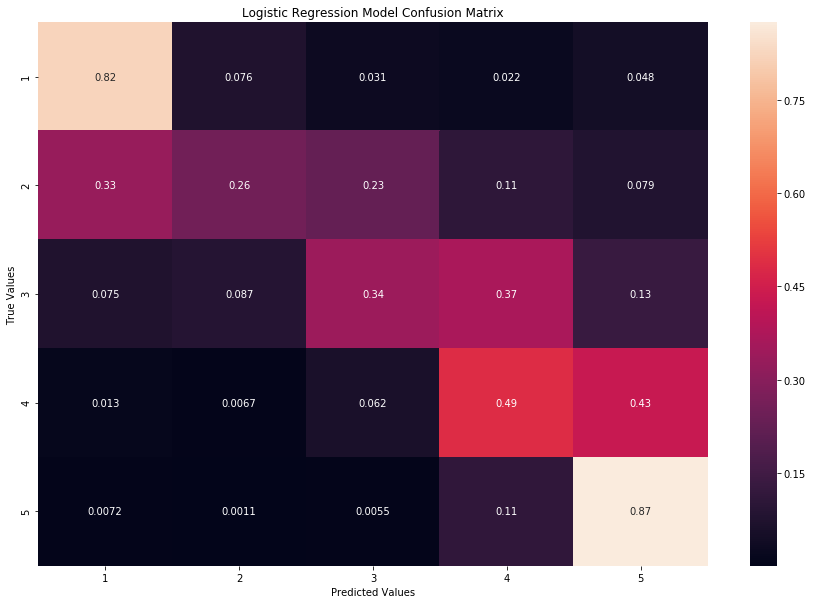

In [221]:
import seaborn as sns

ax = sns.heatmap(confusion/confusion.sum(axis=1)[:, np.newaxis], 
            xticklabels=range(1,6), yticklabels=range(1,6),annot=True)
ax.set(xlabel='Predicted Values', ylabel='True Values')
ax.set_title('Logistic Regression Model Confusion Matrix');

In [211]:
import pickle
filename = 'lrmodel.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [187]:
print(useful.loc[358856][0])

3


In [183]:
usefuly = []
indexlist = list(test_suby.index)
for i in indexlist:
    usefuly.append(useful.loc[i][0])

In [107]:
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter

from bokeh.transform import transform

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [63]:
nbmodel = MultinomialNB()
nbmodel.fit(train_tvectX, train_suby)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
nbmodel.score(test_tvectX, test_suby)

0.6253587243666495

In [133]:
import pickle
filename = 'nbmodel.sav'
pickle.dump(nbmodel, open(filename, 'wb'))

In [225]:
filename = 'tvect.sav'
pickle.dump(tvect, open(filename, 'wb'))

In [114]:
from sklearn.metrics import confusion_matrix
nbconfusion = confusion_matrix(test_suby, nbmodel.predict(test_tvectX))

In [67]:
import seaborn as sns

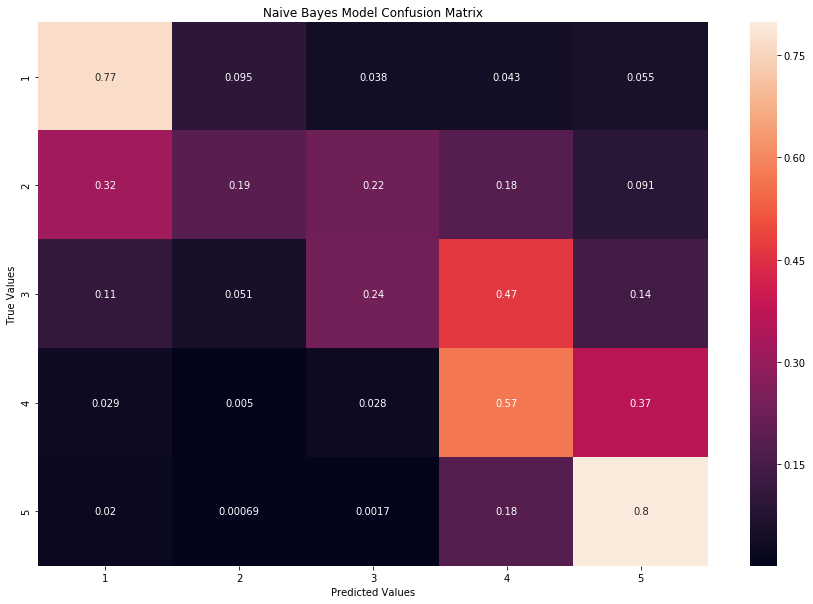

In [222]:
ax2 = sns.heatmap(nbconfusion/nbconfusion.sum(axis=1)[:, np.newaxis], 
            xticklabels=range(1,6), yticklabels=range(1,6),annot=True)
ax2.set(xlabel='Predicted Values', ylabel='True Values')
ax2.set_title('Naive Bayes Model Confusion Matrix');

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
KNN_model = KNeighborsClassifier(n_neighbors=20)
KNN_model.fit(train_vectX, train_suby)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [ ]:
KNN_model.score(test_vectX, test_suby)

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

In [20]:
DT_model.fit(train_vectX, train_suby)
DT_model.score(test_vectX, test_suby)

0.4853944542638311

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
RF_model = RandomForestClassifier(max_depth=50, n_estimators=50)

In [155]:
RF_model.fit(train_tvectX, train_suby)
RF_model.score(test_tvectX, test_suby)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-155-54d241feb7c5>", line 1, in <module>
    RF_model.fit(train_tvectX, train_suby)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py", line 328, in fit
    for i, t in enumerate(trees))
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/gahbrielso/

KeyboardInterrupt: 

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth=2)

In [23]:
DT_model2.fit(train_vectX, train_suby)
DT_model2.score(test_vectX, test_suby)

0.442670619761674

In [ ]:
DT_model

In [15]:
suby.value_counts()

5    112331
4     61419
1     36762
3     30666
2     21905
Name: stars, dtype: int64

In [136]:
minitest = countvect.transform(['This is the most terrible restaurant I have ever been to. The food is disgusting and I would never come here again.'])

In [137]:
logreg.predict_proba(minitest)

array([[0.74251072, 0.11049746, 0.05333474, 0.05018986, 0.04346722]])

In [20]:
logreg.classes_

array([1, 2, 3, 4, 5])

In [14]:
import nltk

In [76]:
subX2 = subX.reset_index()
suby2 = suby.reset_index()

In [80]:
tokened = nltk.pos_tag(nltk.word_tokenize(subX2['text'][0]))

In [81]:
tokened

[('Finally', 'RB'),
 ('something', 'NN'),
 ('else', 'RB'),
 ('besides', 'IN'),
 ('the', 'DT'),
 ('buffets', 'NNS'),
 ('!', '.'),
 ('After', 'IN'),
 ('many', 'JJ'),
 ('delays', 'NNS'),
 ('to', 'TO'),
 ('try', 'VB'),
 ('the', 'DT'),
 ('Artesia', 'NNP'),
 ('location', 'NN'),
 ('and', 'CC'),
 ('having', 'VBG'),
 ('to', 'TO'),
 ('move', 'VB'),
 ('back', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('Bay', 'NNP'),
 ('Area', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('ended', 'VBD'),
 ('up', 'RB'),
 ('here', 'RB'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('family', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('not', 'RB'),
 ('that', 'IN'),
 ('far', 'RB'),
 ('off', 'IN'),
 ('the', 'DT'),
 ('strip', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('yes', 'VB'),
 ('its', 'PRP$'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('middle', 'NN'),
 ('of', 'IN'),
 ('Chinatown/Spring', 'NNP'),
 ('Mountain', 'NNP'),
 ('Road', 'NNP'),
 ('.', '.'),
 ('Was', 'VBP'),
 ("n't", 'RB'),
 ('busy', 'JJ'),
 ('at', 'IN'),
 ('all', 'DT'),
 ('consi

In [73]:
tags = [b[1] for b in tokened]

In [74]:
fd = nltk.FreqDist(tags)

In [75]:
dict(fd)

{'RB': 26,
 'NN': 34,
 'IN': 28,
 'DT': 25,
 'NNS': 9,
 '.': 16,
 'JJ': 12,
 'TO': 7,
 'VB': 5,
 'NNP': 11,
 'CC': 8,
 'VBG': 6,
 ',': 15,
 'PRP': 18,
 'VBD': 14,
 'PRP$': 5,
 'VBZ': 2,
 'VBP': 10,
 'CD': 5,
 'JJS': 3,
 'VBN': 7,
 'RP': 3,
 '$': 3,
 'MD': 1,
 'WRB': 1}

In [208]:
pos_count = []
for i in range(len(subX2['text'])):
    tokened = nltk.pos_tag(nltk.word_tokenize(subX2['text'][i]))
    tags = [b[1] for b in tokened]
    fd = nltk.FreqDist(tags)
    pos_count.append(dict(fd))
    if i%5000==0:
        print(f'done {i}')

NameError: name 'subX2' is not defined

In [86]:
tagged = pd.DataFrame(pos_count)

In [89]:
tagged.columns

Index(['#', '$', '''', '(', ')', ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW',
       'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT',
       'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB',
       'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``'],
      dtype='object')

In [92]:
tagged = tagged.drop(columns=['#', '$', '\'\'', '(', ')', ',', '.', ':','``'])

In [97]:
tagged = tagged.fillna(0)

In [98]:
tagged.to_csv('taggedX.csv')
suby2.to_csv('taggedy.csv')

In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gahbrielso/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gahbrielso/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
taggedX = pd.read_csv('taggedX.csv')
taggedy = pd.read_csv('taggedy.csv')

In [148]:
taggedX = taggedX.drop(columns = ['Unnamed: 0'])

In [150]:
taggedy = taggedy['stars']

In [215]:
train_taggedX, test_taggedX, train_suby2, test_suby2 = train_test_split(taggedX, taggedy, train_size = 0.8)

/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [216]:
from sklearn.linear_model import LogisticRegression
logregpos = LogisticRegression()
logregpos.fit(train_taggedX, train_suby2)
logregpos.score(test_taggedX, test_suby2)

0.47645247733622215

In [223]:
confusion = confusion_matrix(test_suby2, logregpos.predict(test_taggedX))
confusion

array([[ 4792,    94,    90,   789,  9098],
       [ 1660,   136,   171,  1302,  5508],
       [ 1084,   108,   245,  2430,  8473],
       [  902,    83,   198,  3816, 19227],
       [ 1182,    51,   119,  2526, 41150]])

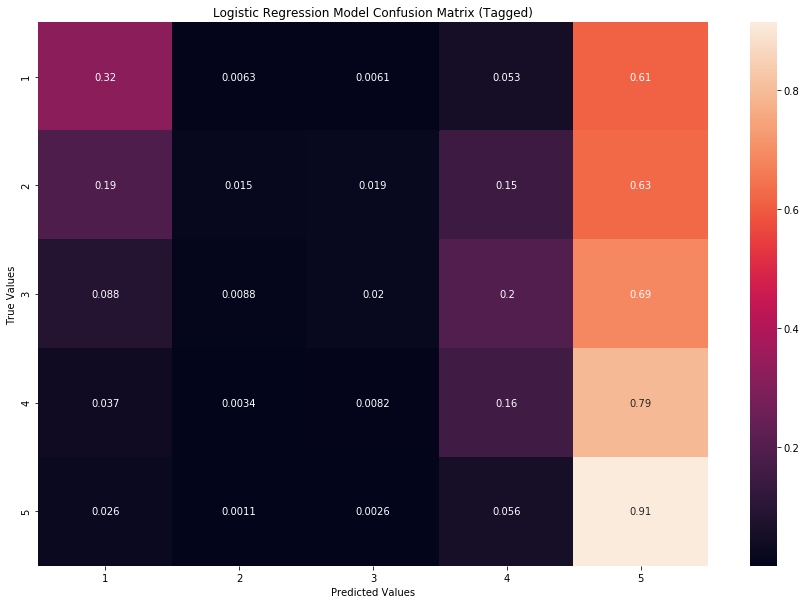

In [224]:
ax = sns.heatmap(confusion/confusion.sum(axis=1)[:, np.newaxis], 
            xticklabels=range(1,6), yticklabels=range(1,6),annot=True)
ax.set(xlabel='Predicted Values', ylabel='True Values')
ax.set_title('Logistic Regression Model Confusion Matrix (Tagged)');

In [218]:
taggedX

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,8.0,5.0,25.0,0.0,0.0,28.0,12.0,0.0,3.0,0.0,...,5.0,14.0,6.0,7.0,10.0,2.0,0.0,0.0,0.0,1.0
1,10.0,1.0,39.0,1.0,0.0,45.0,24.0,2.0,0.0,0.0,...,6.0,21.0,7.0,10.0,7.0,5.0,1.0,2.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,2.0,13.0,1.0,0.0,10.0,12.0,0.0,0.0,0.0,...,7.0,1.0,1.0,2.0,5.0,9.0,1.0,0.0,0.0,0.0
4,4.0,2.0,8.0,0.0,0.0,12.0,10.0,2.0,0.0,0.0,...,7.0,9.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0


In [159]:
logregpos.predict_proba(test_taggedX)

array([[0.13997171, 0.08289686, 0.11589717, 0.23308402, 0.42815024],
       [0.13966821, 0.08354371, 0.11543637, 0.22789477, 0.43345694],
       [0.13937339, 0.08266771, 0.11570769, 0.23253335, 0.42971786],
       ...,
       [0.14209167, 0.08038289, 0.11469115, 0.23400219, 0.4288321 ],
       [0.1396281 , 0.08149215, 0.11667883, 0.2335755 , 0.42862542],
       [0.13958021, 0.08202148, 0.1164218 , 0.23142143, 0.43055509]])

In [155]:
nbpos = MultinomialNB()
nbpos.fit(train_taggedX, train_suby2)
nbpos.score(test_taggedX, test_suby2)

0.45379820210198224

In [114]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier()
DT_model2.fit(train_taggedX, train_suby)
DT_model2.score(test_taggedX, test_suby)

0.3448885341239523

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=150)
RF_model.fit(train_taggedX, train_suby)
RF_model.score(test_taggedX, test_suby)

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/Users/gahbrielso/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 636, in _abort_queues
    self._abort_queue(stream)
  Fi

In [160]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(test_suby, RF_model.predict(test_taggedX))

In [ ]:
confusion